# Chapter 9 Unsupervised Learning

## 1.1 K-Means

### 1.1.1 data acqusition

In [1]:
# import the lib
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt 

# create the numpy array to obtain the blob data
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# obtain the training data
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

### 1.1.2 data plotting

In [2]:
def plot_clusters(X, y=None):
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("x_1", fontsize=14)
    plt.ylabel("x_2", fontsize=14, rotation=0)

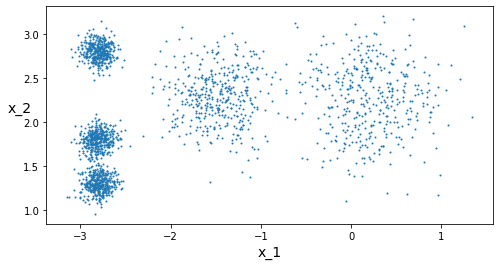

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 1.1.3 Model creation

In [4]:
# import the lib
from sklearn.cluster import KMeans

# define the number of clusters k
k = 5

# create the model object
kmeans = KMeans(n_clusters=k)

# fit
kmeans.fit(X)

# predict
y_pred = kmeans.predict(X)

In [5]:
# show the prediction
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [6]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

### 1.1.4 model improvement - centroid initialisation method

In [8]:
# import the libs
from sklearn.cluster import KMeans
import numpy as np

# set good initialisation centroid (if already known)
good_init = np.array([[-3, 3], [-3, 2], [-1, 2], [0, 2]])

# create the model object with the good initialisation centroids
kmeans_updated = KMeans(n_clusters=5, init=good_init, n_init=1)

In [9]:
# show the inertia 
kmeans.inertia_

211.59853725816828

### 1.1.5 finding the optimal number of clusters, optimal K value

In [13]:
# import the lib
from sklearn.metrics import silhouette_score

# fit the model
kmeans.fit(X)

# show the silhouette score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

## 1.3 Using Clustering for image segmentation

### 1.3.1 load the data

In [5]:
# import the lib
from matplotlib.image import imread
import os
from six.moves import urllib

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

image = imread(os.path.join(images_path, filename))
# show the shape of the data structure
image.shape

(533, 800, 3)

### 1.3.2 clustering step for one single segmentation

In [6]:
# import the lib 
from sklearn.cluster import KMeans

# reshape the image pixel matrix
X = image.reshape(-1, 3)

# create the fitted K-Means model object
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

# obtain the clustered centroids' labels as the processed image pixel matrix
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

# reshape the matrix to the shape of the original image matrix
segmented_img = segmented_img.reshape(image.shape)

### 1.3.3 segmentation results for (2, 4, 6, 8, 10) colours 

In [7]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

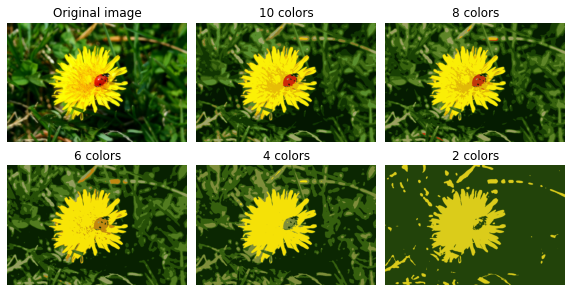

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

## 1.4 Using Clustering for Pre-processing

### 1.4.1 load digits data with load_digits 

In [1]:
# import the lib 
from sklearn.datasets import load_digits

# create training data with instances and labels
X_digits, y_digits = load_digits(return_X_y=True)

### 1.4.2 split the data into training set and test set

In [2]:
# import the lib
from sklearn.model_selection import train_test_split

# create the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

### 1.4.3 create and fit the LR model

In [3]:
# import the lib
from sklearn.linear_model import LogisticRegression

# create the model object
log_reg = LogisticRegression(random_state=42)

# fit
log_reg.fit(X_train, y_train)

# show the baseline 
log_reg.score(X_test, y_test)

/home/michael/MachineLearning/Chapter9/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9555555555555556

### 1.4.4 pre-processing by K-Means Clustering

#### pipeline creation

In [6]:
# import the lib
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# create the pipeline model
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(random_state=42, max_iter=5000, multi_class='ovr')),
])

# fit
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

#### Find the optimal K value

In [8]:
# import the lib
from sklearn.model_selection import GridSearchCV

# define the dictionary for the possible range of parameter grid
param_grid = dict(kmeans__n_clusters=range(2, 100))

# create the Grid Search model
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)

# fit the grid search model
grid_clf.fit(X_train, y_train)

# show the optimal K value
best_param = grid_clf.best_params_.values()
for k in best_param:
    print(k)

# show the accuracy score 
print(grid_clf.score(X_train, y_train))


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

## 1.5 Using Clustering for Semi-Supervised Learning

### 1.5.1 load the data

In [3]:
# import the lib 
from sklearn.datasets import load_digits

# create training data with instances and labels
X_digits, y_digits = load_digits(return_X_y=True)

### 1.5.2 split the data 

In [4]:
# import the lib
from sklearn.model_selection import train_test_split

# create the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

### 1.5.3 cluster the training set into 50 clusters

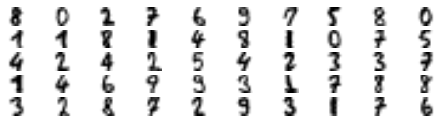

In [6]:
# suppose it is a Unsupervised task
# we can firstly cluster the training set 

# import the lib 
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# difine the number of clusters, k value
k = 50

#create the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)

# fit and transform the training instance matrix into distance matrix
X_digits_dist = kmeans.fit_transform(X_train)

# find the index of the cluster centroids
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

# find all the cluster centroid instances based on the index found above
X_representative_digits = X_train[representative_digit_idx]

# plot the instances
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()


In [9]:
# manually label the instances 
# such that the 50 centroids can become new 50 labeled training instances for further supervised learning

y_representative_digits = np.array([8, 0, 2, 7, 6, 9, 7, 5, 8, 0, 
                                    1, 1, 8, 1, 4, 8, 1, 0, 7, 5, 
                                    4, 2, 4, 2, 5, 4, 2, 3, 3, 7, 
                                    1, 4, 6, 9, 9, 3, 1, 7, 8, 8, 
                                    3, 2, 8, 7, 2, 9, 3, 1, 7, 6])

In [10]:
# import the lib 
from sklearn.linear_model import LogisticRegression

# create a supervsied LR model
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# fit
log_reg.fit(X_representative_digits, y_representative_digits)

# show the accuracy score
print(log_reg.score(X_test, y_test))

0.8933333333333333


# Section 2 Gaussian Mixtures

## the estimation of the weights and all the distribution parameters

### create the data

In [1]:
# import the lib
from sklearn.datasets import make_blobs
import numpy as np

# create the data instances
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

### create Gaussian Mixture model

In [2]:
# import the lib
from sklearn.mixture import GaussianMixture

# create the GM model object
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)

# fit 
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

### display the weights and all the distribution parameters

In [3]:
print("The weights are:\n{}".format(gm.weights_))

print("========================")

print("The expectatiions of all the distributions are:\n{}".format(gm.means_))

print("========================")

print("The covariance matrix are:\n{}".format(gm.covariances_))

The weights are:
[0.39025715 0.40007391 0.20966893]
The expectatiions of all the distributions are:
[[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]
The covariance matrix are:
[[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]


### check if the algorithm converged and iterations

In [4]:
print("If the algorithm converged?: {}".format(gm.converged_))

print("========================")

print("The algorithm runs {} iterations.".format(gm.n_iter_))

If the algorithm converged?: True
The algorithm runs 4 iterations.


### assign and estimate each instance to the most likely cluster

In [5]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [6]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

### sample new instances from the model

In [7]:
X_new, y_new = gm.sample(6) # 6 is the number of sample instances

In [8]:
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [9]:
y_new

array([0, 0, 1, 2, 2, 2])

### density of the model

In [10]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])